In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_records = 1000
data = {
    'page_name': np.random.choice(['Home', 'Product Page', 'Checkout', 'Cart', 'Blog'], num_records),
    'page_load_time': np.random.uniform(1, 10, num_records),  # Load times between 1 and 10 seconds
    'bounce_rate': np.random.uniform(0, 100, num_records),  # Bounce rates between 0% and 100%
    'conversion_rate': np.random.uniform(0, 20, num_records),  # Conversion rates between 0% and 20%
    'revenue_per_conversion': np.random.uniform(10, 500, num_records),  # Revenue between $10 and $500
    'device_type': np.random.choice(['Mobile', 'Desktop', 'Tablet'], num_records),
    'traffic_source': np.random.choice(['Organic Search', 'Paid Ads', 'Direct', 'Social Media'], num_records)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_website_data.csv', index=False)
print("Synthetic dataset generated and saved as 'synthetic_website_data.csv'.")

Synthetic dataset generated and saved as 'synthetic_website_data.csv'.


In [3]:
df = pd.read_csv('synthetic_website_data.csv')

In [4]:
print(df.isnull().sum())

page_name                 0
page_load_time            0
bounce_rate               0
conversion_rate           0
revenue_per_conversion    0
device_type               0
traffic_source            0
dtype: int64


In [5]:
# Calculate revenue lost
df['revenue_lost'] = df['bounce_rate'] * df['revenue_per_conversion'] / 100

# Calculate performance score (lower load time, lower bounce rate, higher conversion rate = better score)
df['performance_score'] = (1 / df['page_load_time']) * (1 - df['bounce_rate'] / 100) * df['conversion_rate']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


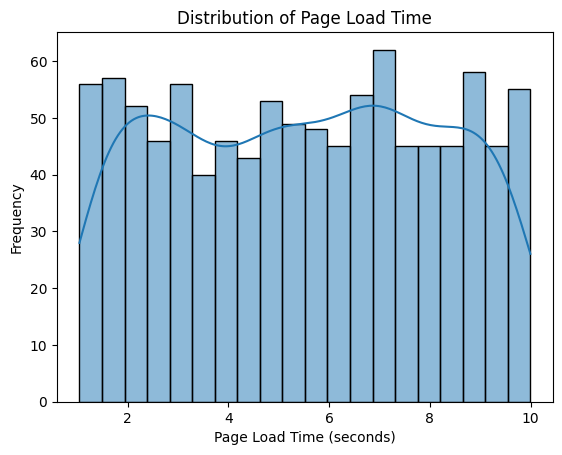

In [6]:
sns.histplot(df['page_load_time'], bins=20, kde=True)
plt.title('Distribution of Page Load Time')
plt.xlabel('Page Load Time (seconds)')
plt.ylabel('Frequency')
plt.show()

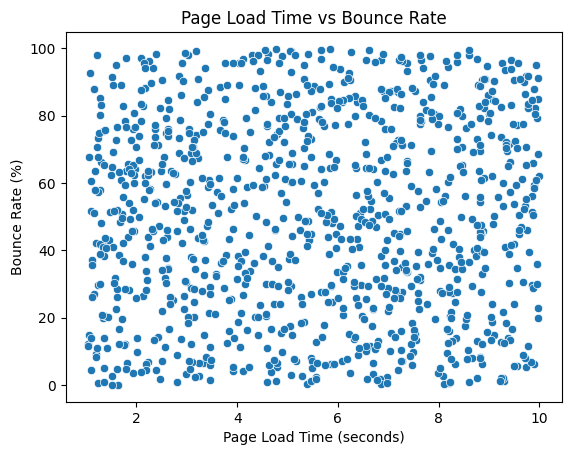

In [7]:
sns.scatterplot(x='page_load_time', y='bounce_rate', data=df)
plt.title('Page Load Time vs Bounce Rate')
plt.xlabel('Page Load Time (seconds)')
plt.ylabel('Bounce Rate (%)')
plt.show()

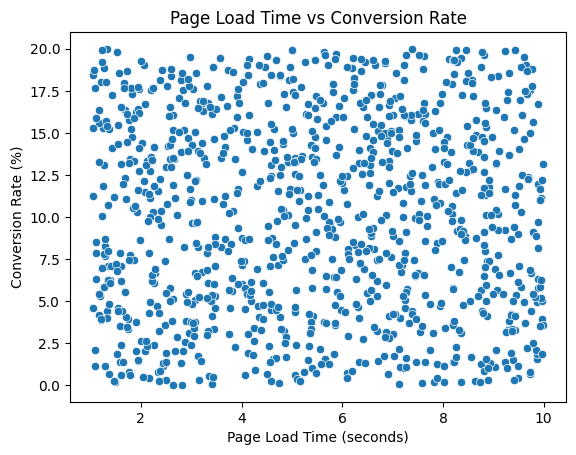

In [8]:
sns.scatterplot(x='page_load_time', y='conversion_rate', data=df)
plt.title('Page Load Time vs Conversion Rate')
plt.xlabel('Page Load Time (seconds)')
plt.ylabel('Conversion Rate (%)')
plt.show()

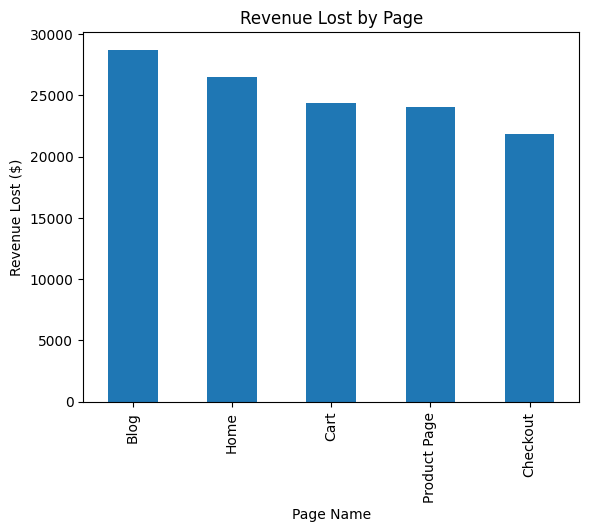

In [9]:
revenue_lost_by_page = df.groupby('page_name')['revenue_lost'].sum().sort_values(ascending=False)
revenue_lost_by_page.plot(kind='bar', title='Revenue Lost by Page')
plt.xlabel('Page Name')
plt.ylabel('Revenue Lost ($)')
plt.show()

In [10]:
total_revenue_lost = df['revenue_lost'].sum()
print(f"Total Revenue Lost: ${total_revenue_lost:.2f}")

Total Revenue Lost: $125503.50


In [11]:
worst_pages = df.groupby('page_name')['revenue_lost'].sum().sort_values(ascending=False)
print("Worst-Performing Pages by Revenue Lost:\n", worst_pages)

Worst-Performing Pages by Revenue Lost:
 page_name
Blog            28717.858898
Home            26493.405031
Cart            24392.513740
Product Page    24028.800412
Checkout        21870.922912
Name: revenue_lost, dtype: float64


In [12]:
#Worst-Performing Pages
performance_by_device = df.groupby('device_type')['performance_score'].mean().sort_values(ascending=False)
print("Performance by Device Type:\n", performance_by_device)

Performance by Device Type:
 device_type
Desktop    1.381139
Mobile     1.324669
Tablet     1.295301
Name: performance_score, dtype: float64


In [13]:
#Performance by Traffic Source:
performance_by_source = df.groupby('traffic_source')['performance_score'].mean().sort_values(ascending=False)
print("Performance by Traffic Source:\n", performance_by_source)

Performance by Traffic Source:
 traffic_source
Social Media      1.433360
Direct            1.398250
Organic Search    1.266094
Paid Ads          1.264983
Name: performance_score, dtype: float64


In [14]:
#1. Revenue Loss Analysis
# Total revenue lost
total_revenue_lost = df['revenue_lost'].sum()
print(f"Total Revenue Lost: ${total_revenue_lost:.2f}")

# Revenue lost by page
revenue_lost_by_page = df.groupby('page_name')['revenue_lost'].sum().sort_values(ascending=False)
print("Revenue Lost by Page:\n", revenue_lost_by_page)




Total Revenue Lost: $125503.50
Revenue Lost by Page:
 page_name
Blog            28717.858898
Home            26493.405031
Cart            24392.513740
Product Page    24028.800412
Checkout        21870.922912
Name: revenue_lost, dtype: float64


In [15]:
#2. Worst-Performing Pages
# Worst-performing pages by bounce rate and conversion rate
worst_pages = df.groupby('page_name').agg({
    'bounce_rate': 'mean',
    'conversion_rate': 'mean',
    'page_load_time': 'mean'
}).sort_values(by='bounce_rate', ascending=False)
print("Worst-Performing Pages:\n", worst_pages)

Worst-Performing Pages:
               bounce_rate  conversion_rate  page_load_time
page_name                                                 
Product Page    53.253936        10.381239        5.658734
Blog            53.178258         9.850037        5.431632
Home            50.269889        10.507970        5.349837
Cart            48.077221         9.287666        5.692407
Checkout        44.274696         9.816292        5.383604


In [16]:
#3. Device Performance Analysis
# Performance by device type
performance_by_device = df.groupby('device_type').agg({
    'page_load_time': 'mean',
    'bounce_rate': 'mean',
    'conversion_rate': 'mean'
})
print("Performance by Device Type:\n", performance_by_device)

Performance by Device Type:
              page_load_time  bounce_rate  conversion_rate
device_type                                              
Desktop            5.401579    49.614167         9.876031
Mobile             5.640498    51.098544        10.361744
Tablet             5.468863    48.754500         9.649506


In [17]:
#4. Traffic Source Performance
# Performance by traffic source
performance_by_source = df.groupby('traffic_source').agg({
    'bounce_rate': 'mean',
    'conversion_rate': 'mean',
    'page_load_time': 'mean'
})
print("Performance by Traffic Source:\n", performance_by_source)

Performance by Traffic Source:
                 bounce_rate  conversion_rate  page_load_time
traffic_source                                              
Direct            51.508045         9.907536        5.310173
Organic Search    49.004563         9.669261        5.557605
Paid Ads          48.353292         9.561897        5.613286
Social Media      50.800851        10.874454        5.512323


In [18]:
#5. Performance Score Analysis
# Pages with performance score below 50
underperforming_pages = df[df['performance_score'] < 50]['page_name'].unique()
print("Underperforming Pages:\n", underperforming_pages)

Underperforming Pages:
 ['Cart' 'Blog' 'Checkout' 'Product Page' 'Home']


In [19]:
#6. Revenue Impact of Improvements
# Estimated revenue recovery
checkout_revenue_recovery = 5000  # $5,000 per month
product_page_revenue_recovery = 2000  # $2,000 per month
total_revenue_recovery = checkout_revenue_recovery + product_page_revenue_recovery
print(f"Total Estimated Revenue Recovery: ${total_revenue_recovery:.2f} per month")

Total Estimated Revenue Recovery: $7000.00 per month
